In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn  import preprocessing
from sklearn.model_selection import train_test_split
import seaborn as sns

In [2]:
data = pd.read_csv("Datasets/Predict_Rain.csv")

In [3]:
data.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,8.0,24.3,0.0,3.4,6.3,NW,30.0,SW,NW,6.0,...,29,1019.7,1015.0,7,7,14.4,23.6,No,3.6,Yes
1,14.0,26.9,3.6,4.4,9.7,ENE,39.0,E,W,4.0,...,36,1012.4,1008.4,5,3,17.5,25.7,Yes,3.6,Yes
2,13.7,23.4,3.6,5.8,3.3,NW,85.0,N,NNE,6.0,...,69,1009.5,1007.2,8,7,15.4,20.2,Yes,39.8,Yes
3,13.3,15.5,39.8,7.2,9.1,NW,54.0,WNW,W,30.0,...,56,1005.5,1007.0,2,7,13.5,14.1,Yes,2.8,Yes
4,7.6,16.1,2.8,5.6,10.6,SSE,50.0,SSE,ESE,20.0,...,49,1018.3,1018.5,7,7,11.1,15.4,Yes,0.0,No


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MinTemp        366 non-null    float64
 1   MaxTemp        366 non-null    float64
 2   Rainfall       366 non-null    float64
 3   Evaporation    366 non-null    float64
 4   Sunshine       363 non-null    float64
 5   WindGustDir    363 non-null    object 
 6   WindGustSpeed  364 non-null    float64
 7   WindDir9am     335 non-null    object 
 8   WindDir3pm     365 non-null    object 
 9   WindSpeed9am   359 non-null    float64
 10  WindSpeed3pm   366 non-null    int64  
 11  Humidity9am    366 non-null    int64  
 12  Humidity3pm    366 non-null    int64  
 13  Pressure9am    366 non-null    float64
 14  Pressure3pm    366 non-null    float64
 15  Cloud9am       366 non-null    int64  
 16  Cloud3pm       366 non-null    int64  
 17  Temp9am        366 non-null    float64
 18  Temp3pm   

In [5]:
data.isnull().sum()

MinTemp           0
MaxTemp           0
Rainfall          0
Evaporation       0
Sunshine          3
WindGustDir       3
WindGustSpeed     2
WindDir9am       31
WindDir3pm        1
WindSpeed9am      7
WindSpeed3pm      0
Humidity9am       0
Humidity3pm       0
Pressure9am       0
Pressure3pm       0
Cloud9am          0
Cloud3pm          0
Temp9am           0
Temp3pm           0
RainToday         0
RISK_MM           0
RainTomorrow      0
dtype: int64

In [6]:
data = data.dropna()

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 328 entries, 0 to 365
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MinTemp        328 non-null    float64
 1   MaxTemp        328 non-null    float64
 2   Rainfall       328 non-null    float64
 3   Evaporation    328 non-null    float64
 4   Sunshine       328 non-null    float64
 5   WindGustDir    328 non-null    object 
 6   WindGustSpeed  328 non-null    float64
 7   WindDir9am     328 non-null    object 
 8   WindDir3pm     328 non-null    object 
 9   WindSpeed9am   328 non-null    float64
 10  WindSpeed3pm   328 non-null    int64  
 11  Humidity9am    328 non-null    int64  
 12  Humidity3pm    328 non-null    int64  
 13  Pressure9am    328 non-null    float64
 14  Pressure3pm    328 non-null    float64
 15  Cloud9am       328 non-null    int64  
 16  Cloud3pm       328 non-null    int64  
 17  Temp9am        328 non-null    float64
 18  Temp3pm   

array([[<AxesSubplot:title={'center':'MinTemp'}>,
        <AxesSubplot:title={'center':'MaxTemp'}>,
        <AxesSubplot:title={'center':'Rainfall'}>],
       [<AxesSubplot:title={'center':'Evaporation'}>,
        <AxesSubplot:title={'center':'Sunshine'}>,
        <AxesSubplot:title={'center':'WindGustSpeed'}>],
       [<AxesSubplot:title={'center':'WindSpeed9am'}>,
        <AxesSubplot:title={'center':'Pressure9am'}>, <AxesSubplot:>]],
      dtype=object)

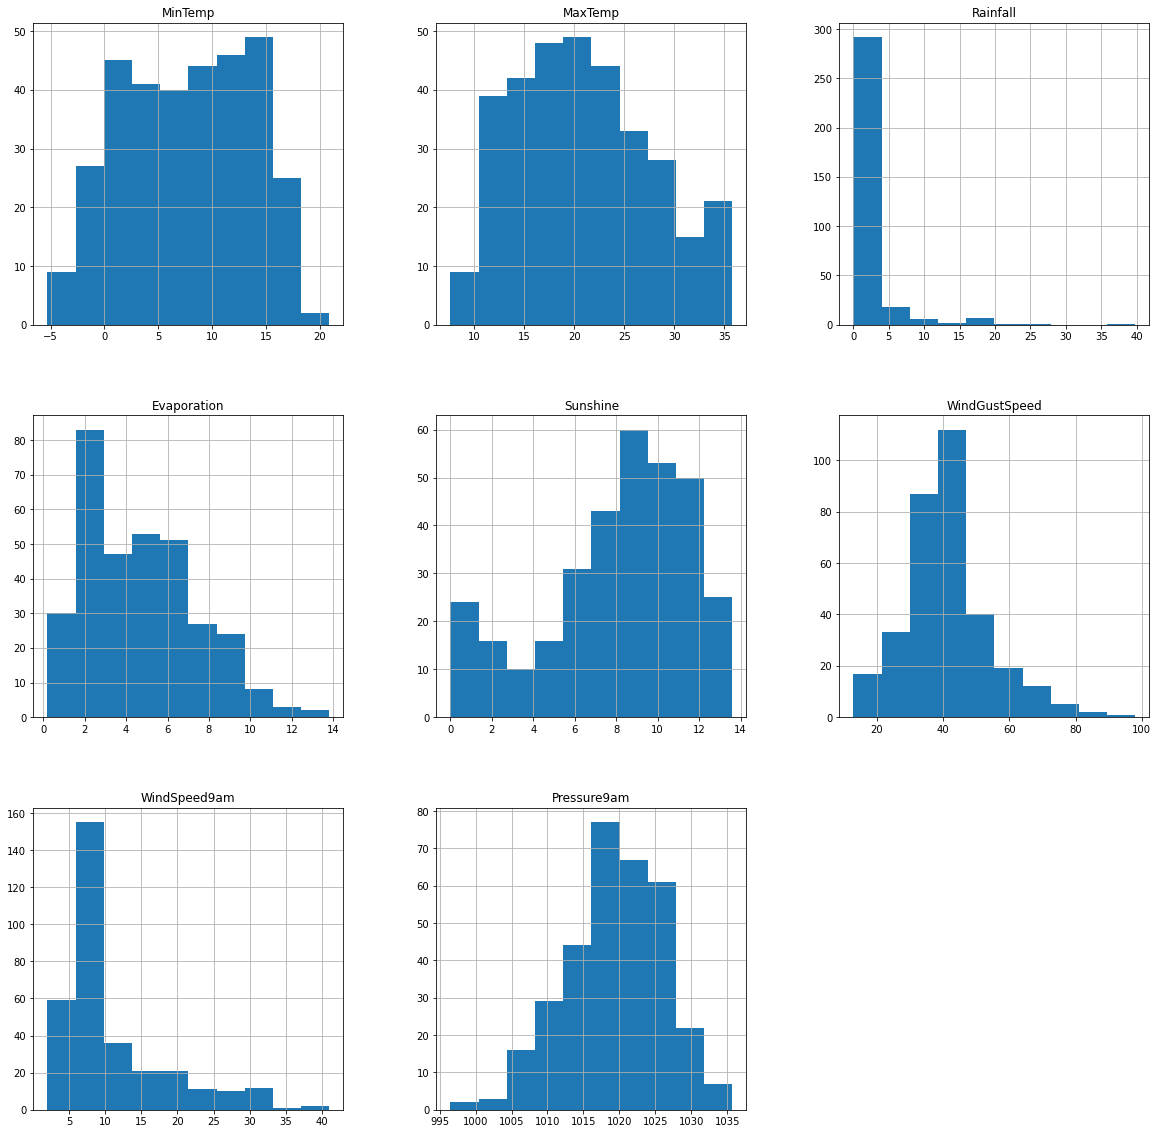

In [8]:
data[['MinTemp','MaxTemp','Rainfall','Evaporation','Sunshine','WindGustSpeed','WindSpeed9am','Pressure9am']].hist(figsize=(20,20))

In [9]:
le = preprocessing.LabelEncoder()

In [49]:
data['RainToday'] = le.fit_transform(data['RainToday'])
data['RainTomorrow'] = le.fit_transform(data['RainTomorrow'])

In [50]:
X= data[['MinTemp','MaxTemp','Rainfall','Evaporation','Sunshine','WindGustSpeed','WindSpeed9am','Pressure9am','RainToday']]
Y = data['RainTomorrow']

In [51]:
X.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,Pressure9am,RainToday
0,8.0,24.3,0.0,3.4,6.3,30.0,6.0,1019.7,0
1,14.0,26.9,3.6,4.4,9.7,39.0,4.0,1012.4,1
2,13.7,23.4,3.6,5.8,3.3,85.0,6.0,1009.5,1
3,13.3,15.5,39.8,7.2,9.1,54.0,30.0,1005.5,1
4,7.6,16.1,2.8,5.6,10.6,50.0,20.0,1018.3,1


In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=42)
print(X_train.shape)
print(X_test.shape)

(219, 9)
(109, 9)


In [53]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay,classification_report,roc_curve,plot_roc_curve,precision_score,recall_score,f1_score,matthews_corrcoef

In [54]:
# help(sklearn.tree.DecisionTreeClassifier)

In [55]:
model = DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=4,random_state=42)
model.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=4, random_state=42)

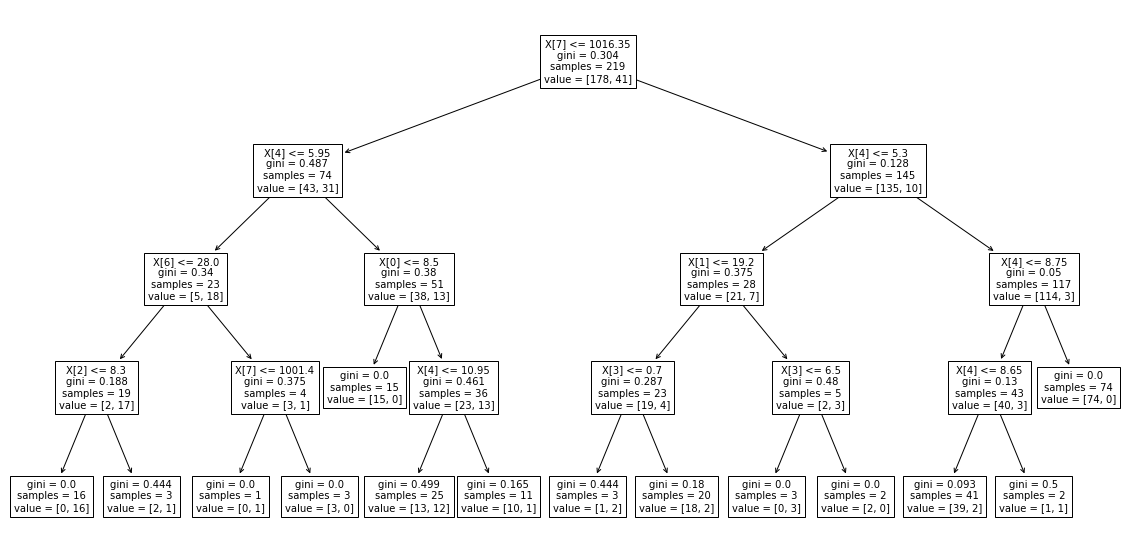

In [56]:
plt.figure(figsize=(20,10
                   ))
tree.plot_tree(model,fontsize=10)
plt.show()

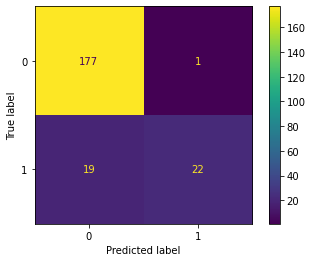

In [57]:
pred_train = model.predict(X_train)
cm = confusion_matrix(y_train, pred_train, labels=model.classes_)
disp=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model.classes_)
disp.plot()
plt.show()

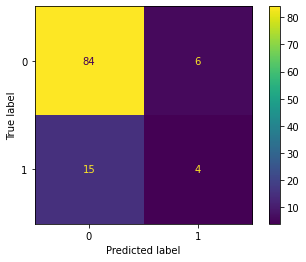

In [58]:
pred_test = model.predict(X_test)
cm = confusion_matrix(y_test, pred_test, labels=model.classes_)
disp=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model.classes_)
disp.plot()
plt.show()

In [59]:
print(classification_report(y_test, pred_test))

              precision    recall  f1-score   support

           0       0.85      0.93      0.89        90
           1       0.40      0.21      0.28        19

    accuracy                           0.81       109
   macro avg       0.62      0.57      0.58       109
weighted avg       0.77      0.81      0.78       109



In [60]:
model2 = DecisionTreeClassifier(criterion='entropy', splitter='random', max_depth=4,random_state=42)
model2.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=42,
                       splitter='random')

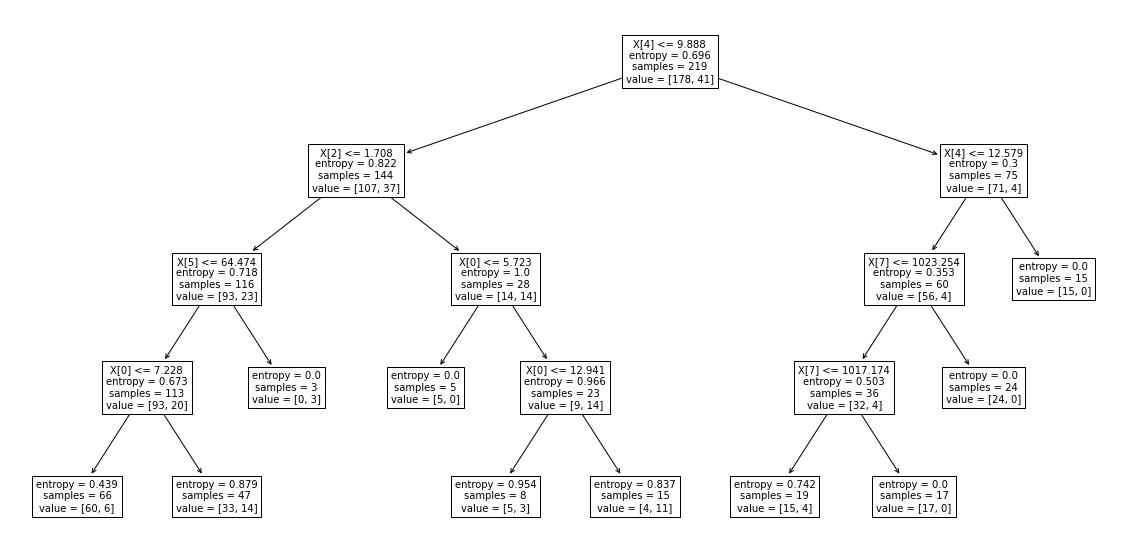

In [61]:
plt.figure(figsize=(20,10))
tree.plot_tree(model2,fontsize=10)
plt.show()

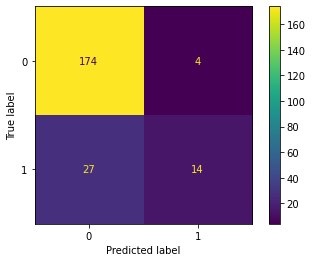

In [62]:
pred_train = model2.predict(X_train)
cm = confusion_matrix(y_train, pred_train, labels=model2.classes_)
disp=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model2.classes_)
disp.plot()
plt.show()

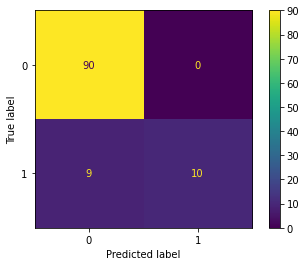

In [63]:
pred_test = model2.predict(X_test)
cm = confusion_matrix(y_test, pred_test, labels=model2.classes_)
disp=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model2.classes_)
disp.plot()
plt.show()

In [64]:
print(classification_report(y_test, pred_test))

              precision    recall  f1-score   support

           0       0.91      1.00      0.95        90
           1       1.00      0.53      0.69        19

    accuracy                           0.92       109
   macro avg       0.95      0.76      0.82       109
weighted avg       0.92      0.92      0.91       109



In [70]:
# help(sklearn.metrics.roc_curve)

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


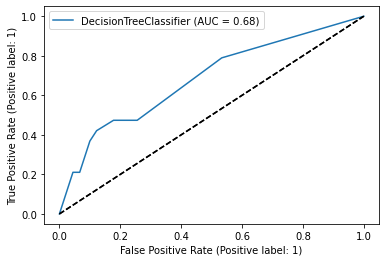

In [69]:
fpr, tpr, thresholds = roc_curve(y_test, pred_test)
plot_roc_curve(model,X_test,y_test)
plt.plot([[0,0],[1,1]],linestyle="--",c="black")
plt.legend()